In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.gridspec as gridspec
from astropy import constants
import glob
#import seaborn as sns
import scipy.optimize as opt
from scipy.optimize import curve_fit
import scipy.stats 
import scipy.io 
import pickle
import bin_tools as bt
import pandas as pd
from spectres import spectres

In [7]:
%matplotlib nbagg

In [2]:
loga,ae_up,ae_low, H2O,he_up,he_low, CO2,ce_up,ce_low = np.loadtxt('retrieval_info.txt',unpack=True)

labels=['All species','simple+haze','chem-species','chem-species2','DeckHazeAtmoComp','noH-TiO',"noH-VO",'chem-species3','atmo_2EB','chem-species5','chem-species5b','chem-species4','chem6','DeckHaze TiO','DeckHaze H-','SimpleDeckHaze']
yval = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
flag = [0,2,0,0,2,2,2,0,2,0,1,1,1,1,1,1]

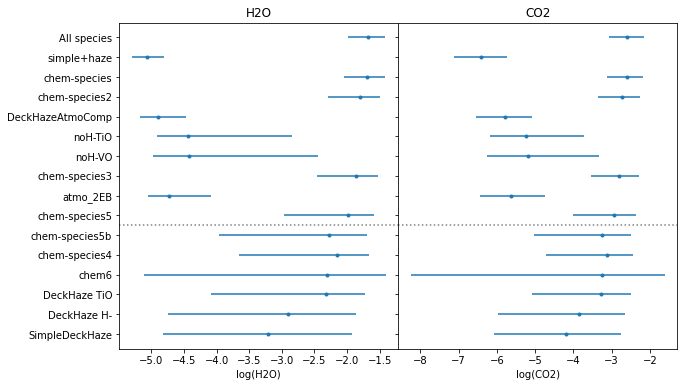

In [3]:
fig, ax = plt.subplots(1,2,figsize=(10,6),sharey=True)
plt.subplots_adjust(wspace=0.0)
ax[1].errorbar(CO2, yval, xerr=[ce_low,ce_up], marker='.', ls='none')
ax[0].set_yticks(yval)
ax[0].set_yticklabels(labels)
ax[1].set_xlabel('log(CO2)')
ax[1].set_title('CO2',fontsize='large')
ax[0].errorbar(H2O, yval, xerr=[he_low,he_up], marker='.', ls='none')
ax[0].set_xlabel('log(H2O)')
ax[0].set_title('H2O',fontsize='large')
ax[0].axhline(6.5,ls=':',color='k',alpha=0.5)
ax[1].axhline(6.5,ls=':',color='k',alpha=0.5)
plt.show()


In [4]:
No, flag, FP, DOF, redchi, chi, BIC, lnZ, CDF, T, Tup, Tlo, Rp, Rpup, Rplo, Hm, Hmup, Hmlo, Na, Naup, Nalo, K, Kup, Klo, h2o, H2Oup, H2Olo, CH4, CH4up, CH4lo, CO, COup, COlo, co2, CO2up, CO2lo, TiO, TiOup, TiOlo, VO, VOup, VOlo, loga, logaup, logalo, gamma, gammaup, gammalo, logP, logPup, logPlo = np.loadtxt('full_retrieval_continuum.txt', unpack=True)

In [8]:
bounds = np.loadtxt('poseidon_bounds.txt')
# 0 T
# 1 Rp
# 2 H-
# 3 Na
# 4 K
# 5 H2O
# 6 CH4
# 7 CO
# 8 CO2
# 9 Tio
# 10 VO
# 11 loga
# 12 gamma
# 13 logPcloud

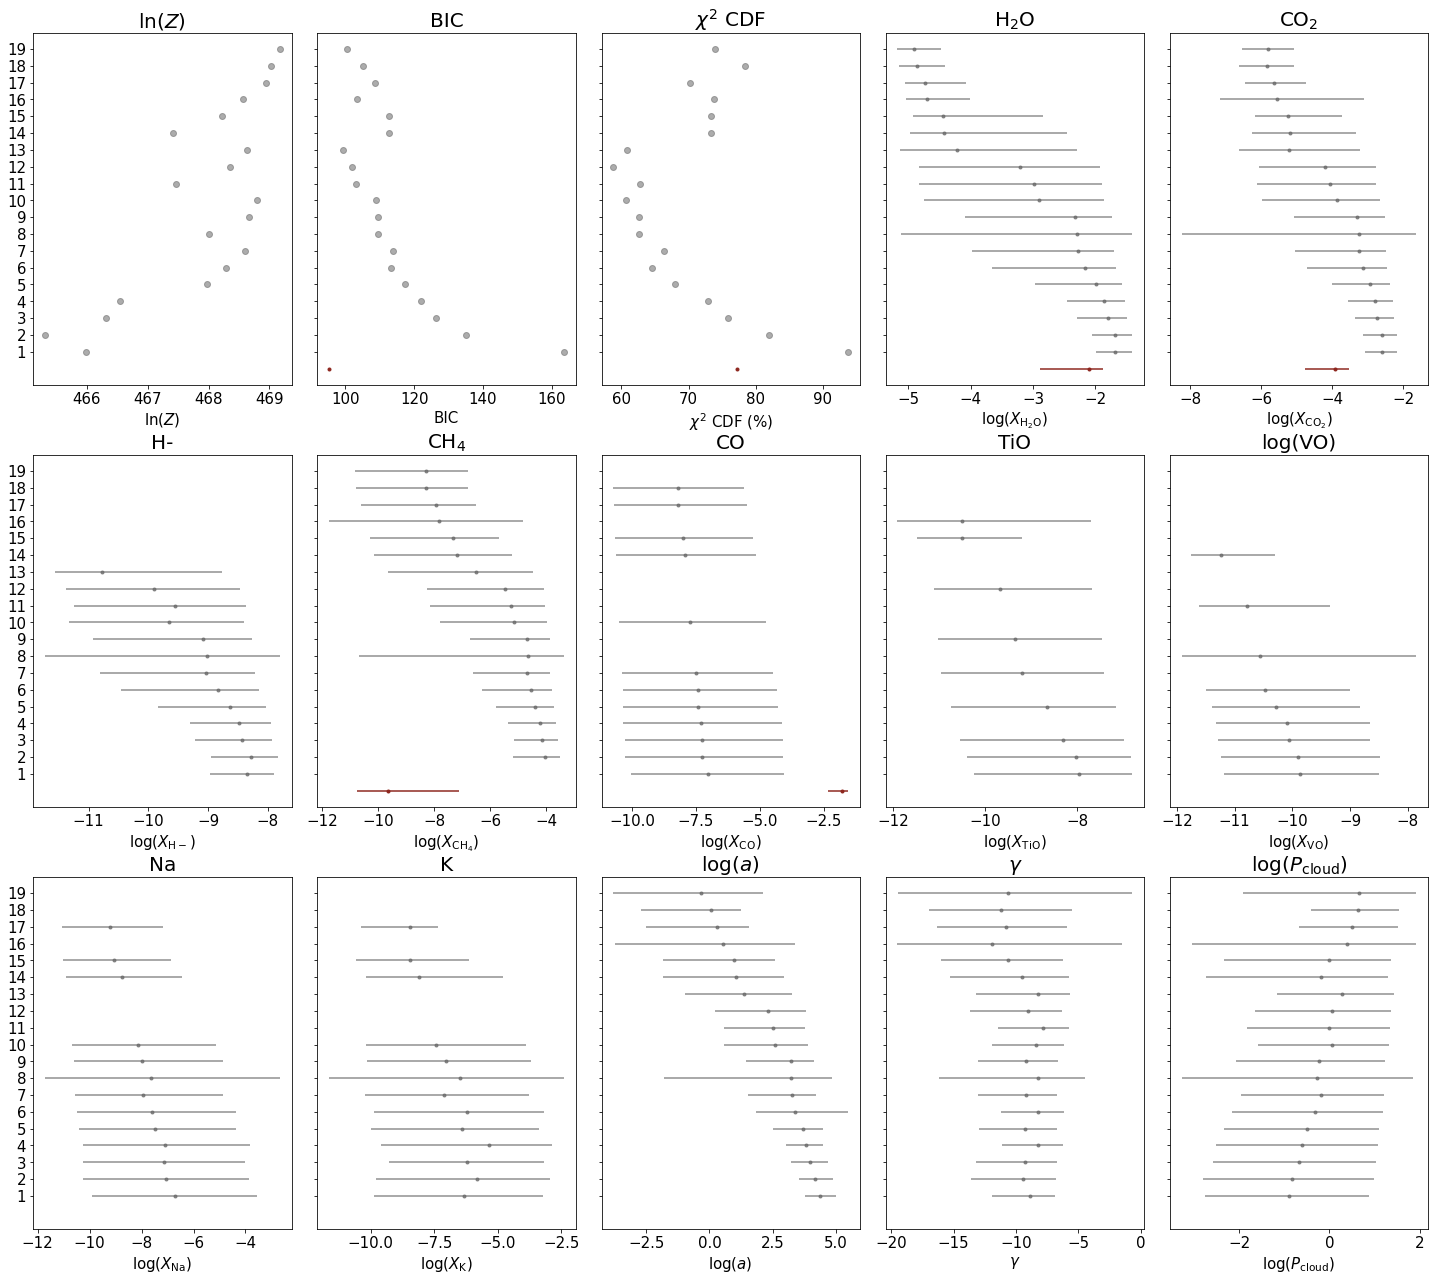

In [9]:
fig, ax = plt.subplots(3,5,figsize=(25,22),sharey=True)
plt.subplots_adjust(wspace=0.1)

ax[0,0].errorbar(lnZ, No, marker='o', ls='none', color='dimgrey',alpha=0.55)
ax[0,0].set_xlabel('ln($Z$)', fontsize=15)
ax[0,0].set_title('ln($Z$)',fontsize=20)
ax[0,0].tick_params(axis='both', which='major', labelsize=15)
#ax[0,0].set_ylim(-0.2,18,2)

ax[0,1].set_xlabel('BIC', fontsize=15)
ax[0,1].set_title('BIC',fontsize=20)
ax[0,1].errorbar(BIC, No, marker='o', ls='none', color='dimgrey', alpha=0.55)
ax[0,1].errorbar(95.27,0,marker='.', color='#8D261E')
ax[0,1].tick_params(axis='both', which='major', labelsize=15)

ax[0,2].errorbar(CDF, No, marker='o', ls='none', color='dimgrey', alpha=0.55)
ax[0,2].set_xlabel('$\chi^2$ CDF (%)', fontsize=15)
ax[0,2].set_title('$\chi^2$ CDF',fontsize=20)
ax[0,2].errorbar(77.19,0,marker='.', color='#8D261E')
ax[0,2].tick_params(axis='both', which='major', labelsize=15)


ax[0,3].errorbar(h2o, No, xerr=[H2Olo,H2Oup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[0,3].set_xlabel('log($X_\mathrm{H_2O}$)', fontsize=15)
ax[0,3].set_title('H$_2$O',fontsize=20)
ax[0,3].errorbar(bounds[5][9],0,xerr=[[bounds[5][11]],[bounds[5][10]]],marker='.', color='#8D261E', label='ATMO')
ax[0,3].tick_params(axis='both', which='major', labelsize=15)


ax[0,4].set_xlabel('log($X_\mathrm{CO_2}$)', fontsize=15)
ax[0,4].set_title('CO$_2$',fontsize=20)
ax[0,4].errorbar(co2, No, xerr=[CO2lo,CO2up], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[0,4].errorbar(bounds[8][9],0,xerr=[[bounds[8][11]],[bounds[8][10]]],marker='.', color='#8D261E')
ax[0,4].tick_params(axis='both', which='major', labelsize=15)


ax[1,0].set_xlabel('log($X_\mathrm{H-}$)', fontsize=15)
ax[1,0].set_title('H-',fontsize=20)
ax[1,0].errorbar(Hm, No, xerr=[Hmlo,Hmup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[1,0].tick_params(axis='both', which='major', labelsize=15)


ax[1,1].set_xlabel('log($X_\mathrm{CH_4}$)', fontsize=15)
ax[1,1].set_title('CH$_4$',fontsize=20)
ax[1,1].errorbar(CH4, No, xerr=[CH4lo,CH4up], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[1,1].errorbar(bounds[6][9],0,xerr=[[bounds[6][11]],[bounds[6][10]]],marker='.', color='#8D261E')
ax[1,1].tick_params(axis='both', which='major', labelsize=15)


ax[1,2].set_xlabel('log($X_\mathrm{CO}$)', fontsize=15)
ax[1,2].set_title('CO',fontsize=20)
ax[1,2].errorbar(CO, No, xerr=[COlo,COup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[1,2].errorbar(-1.77,0,xerr=[[0.57],[0.23]],marker='.', color='#8D261E')
ax[1,2].tick_params(axis='both', which='major', labelsize=15)


ax[1,3].set_xlabel('log($X_\mathrm{TiO}$)', fontsize=15)
ax[1,3].set_title('TiO',fontsize=20)
ax[1,3].errorbar(TiO, No, xerr=[TiOlo,TiOup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[1,3].tick_params(axis='both', which='major', labelsize=15)

ax[1,4].set_xlabel('log($X_\mathrm{VO}$)', fontsize=15)
ax[1,4].set_title('log(VO)',fontsize=20)
ax[1,4].errorbar(VO, No, xerr=[VOlo,VOup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[1,4].tick_params(axis='both', which='major', labelsize=15)


ax[2,0].set_xlabel('log($X_\mathrm{Na}$)', fontsize=15)
ax[2,0].set_title('Na',fontsize=20)
ax[2,0].errorbar(Na, No, xerr=[Nalo,Naup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[2,0].tick_params(axis='both', which='major', labelsize=15)


ax[2,1].set_xlabel('log($X_\mathrm{K}$)', fontsize=15)
ax[2,1].set_title('K',fontsize=20)
ax[2,1].errorbar(K, No, xerr=[Klo,Kup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[2,1].tick_params(axis='both', which='major', labelsize=15)

ax[2,2].set_xlabel('log($a$)', fontsize=15)
ax[2,2].set_title('log($a$)',fontsize=20)
ax[2,2].errorbar(loga, No, xerr=[logalo,logaup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[2,2].tick_params(axis='both', which='major', labelsize=15)


ax[2,3].set_xlabel('$\gamma$', fontsize=15)
ax[2,3].set_title('$\gamma$',fontsize=20)
ax[2,3].errorbar(gamma, No, xerr=[gammalo,gammaup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[2,3].tick_params(axis='both', which='major', labelsize=15)


ax[2,4].set_xlabel('log($P_\mathrm{cloud}$)', fontsize=15)
ax[2,4].set_title('log($P_\mathrm{cloud}$)',fontsize=20)
ax[2,4].errorbar(logP, No, xerr=[logPlo,logPup], marker='.', ls='none', color='dimgrey', alpha=0.75)
ax[2,4].tick_params(axis='both', which='major', labelsize=15)


#ax[0,0].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[0,0].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[0,1].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[0,1].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[0,2].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[0,2].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[0,3].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[0,3].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[0,4].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[0,4].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[0,5].axhline(5.5,ls=':',color='k',alpha=0.5)
#ax[0,5].axhline(12.5,ls=':',color='k',alpha=0.5)

#ax[1,0].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[1,0].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[1,1].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[1,1].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[1,2].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[1,2].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[1,3].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[1,3].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[1,4].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[1,4].axhline(15.5,ls=':',color='k',alpha=0.35)

#ax[2,0].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[2,0].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[2,1].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[2,1].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[2,2].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[2,2].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[2,3].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[2,3].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[2,4].axhline(5.5,ls=':',color='k',alpha=0.35)
#ax[2,4].axhline(15.5,ls=':',color='k',alpha=0.35)
#ax[1,5].axhline(5.5,ls=':',color='k',alpha=0.5)
#ax[1,5].axhline(12.5,ls=':',color='k',alpha=0.5)

ax[0,0].set_yticks(No)

plt.savefig("retrieval_errors.pdf", bbox_inches='tight')
plt.show()

In [10]:
def bin_spectrum_fast(wl_native, spectrum_native, R_bin=100):
        
    # Create binned wavelength grid at resolution R_bin
    delta_log_wl_bins = 1.0/R_bin
    N_wl_bins = (np.log(wl_native[-1]) - np.log(wl_native[0])) / delta_log_wl_bins
    N_wl_bins = np.around(N_wl_bins).astype(np.int64)
    log_wl_binned = np.linspace(np.log(wl_native[0]), np.log(wl_native[-1]), N_wl_bins)    
    wl_binned = np.exp(log_wl_binned)
    
    spectrum_binned = spectres(wl_binned, wl_native, spectrum_native,
                               verbose = False)
    
    return wl_binned[1:-1], spectrum_binned[1:-1]   # Cut out first and last values to avoid nans
                

In [12]:
w, we, depths, depthse = np.loadtxt('W17_transmission_spectrum.txt',unpack=True)

In [13]:
#wl | -2 sigma | -1 sigma | median | +1 sigma | +2 sigma 

wl_atmo_dh, low2_atmo_dh, low1_atmo_dh, med_atmo_dh, up1_atmo_dh, up2_atmo_dh = np.loadtxt('WASP17b_4000atmo_deckhaze-.txt', unpack=True)
wl_atmo_2eb, low2_atmo_2eb, low1_atmo_2eb, med_atmo_2eb, up1_atmo_2eb, up2_atmo_2eb = np.loadtxt('WASP17b_4000atmo_2EB-.txt', unpack=True)
wl_cs5, low2_cs5, low1_cs5, med_cs5, up1_cs5, up2_cs5 = np.loadtxt('WASP17b_4000chem_species5-.txt', unpack=True)

wl_cs5IR, low2_cs5IR, low1_cs5IR, med_cs5IR, up1_cs5IR, up2_cs5IR = np.loadtxt('WASP17b_4000chem_species5IR-.txt', unpack=True)
wl_adhIR, low2_adhIR, low1_adhIR, med_adhIR, up1_adhIR, up2_adhIR = np.loadtxt('WASP17b_4000atmo_deckhazeIR-.txt', unpack=True)

In [15]:
atmo_wl, atmo_med, atmo_low1, atmo_up1, atmo_low2, atmo_up2,_,_ = np.loadtxt('atmo.txt', unpack=True)

In [16]:
atmo_dh_wl_binned, atmo_dh_med_binned = bin_spectrum_fast(wl_atmo_dh, med_atmo_dh)
_, atmo_dh_low1_binned = bin_spectrum_fast(wl_atmo_dh, low1_atmo_dh)
_, atmo_dh_low2_binned = bin_spectrum_fast(wl_atmo_dh, low2_atmo_dh)
_, atmo_dh_up1_binned = bin_spectrum_fast(wl_atmo_dh, up1_atmo_dh)
_, atmo_dh_up2_binned = bin_spectrum_fast(wl_atmo_dh, up2_atmo_dh)

atmo_2eb_wl_binned, atmo_2eb_med_binned = bin_spectrum_fast(wl_atmo_2eb, med_atmo_2eb)
_, atmo_2eb_low1_binned = bin_spectrum_fast(wl_atmo_2eb, low1_atmo_2eb)
_, atmo_2eb_low2_binned = bin_spectrum_fast(wl_atmo_2eb, low2_atmo_2eb)
_, atmo_2eb_up1_binned = bin_spectrum_fast(wl_atmo_2eb, up1_atmo_2eb)
_, atmo_2eb_up2_binned = bin_spectrum_fast(wl_atmo_2eb, up2_atmo_2eb)

cs5_wl_binned, cs5_med_binned = bin_spectrum_fast(wl_cs5, med_cs5)
_, cs5_low1_binned = bin_spectrum_fast(wl_cs5, low1_cs5)
_, cs5_low2_binned = bin_spectrum_fast(wl_cs5, low2_cs5)
_, cs5_up1_binned = bin_spectrum_fast(wl_cs5, up1_cs5)
_, cs5_up2_binned = bin_spectrum_fast(wl_cs5, up2_cs5)

cs5IR_wl_binned, cs5IR_med_binned = bin_spectrum_fast(wl_cs5IR, med_cs5IR)
_, cs5IR_low1_binned = bin_spectrum_fast(wl_cs5IR, low1_cs5IR)
_, cs5IR_low2_binned = bin_spectrum_fast(wl_cs5IR, low2_cs5IR)
_, cs5IR_up1_binned = bin_spectrum_fast(wl_cs5IR, up1_cs5IR)
_, cs5IR_up2_binned = bin_spectrum_fast(wl_cs5IR, up2_cs5IR)

adhIR_wl_binned, adhIR_med_binned = bin_spectrum_fast(wl_adhIR, med_adhIR)
_, adhIR_low1_binned = bin_spectrum_fast(wl_adhIR, low1_adhIR)
_, adhIR_low2_binned = bin_spectrum_fast(wl_adhIR, low2_adhIR)
_, adhIR_up1_binned = bin_spectrum_fast(wl_adhIR, up1_adhIR)
_, adhIR_up2_binned = bin_spectrum_fast(wl_adhIR, up2_adhIR)

'#3A763E' # Dark green, Minimal
'#6FAC69'
'#B1DAA5'
'#DDEFD5' # Light green

'#6D2F7F' # Dark purple, Sample 2
'#9372A7'
'#BDA6CC'
'#E4D5E7' # Light purple

'#690505' # Dark red, IR
'#8D261E'
'#C55A62'
'#EEC0BC' # Light red

'#2A377B' # Dark blue, ATMO
'#3D608F'
'#6E8DC9'
'#A8C8E6' # Light blue

'#a63603' # Dark orange
'#d94701'
'#fd8d3c'
'#F2CEA1' # Light orange, Sample 1

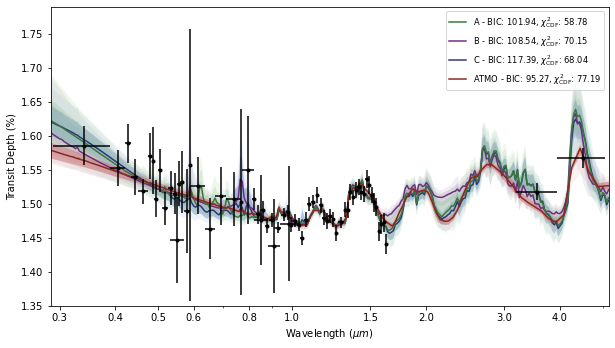

In [17]:
fig, ax1 = plt.subplots(1,figsize=(10,5.5))

ax1.errorbar(w,depths*100, xerr=we, yerr= depthse*100, marker='.', color='k', ls='None',zorder=1)

ax1.plot(5,10,color='#3A763E', label='A - BIC: 101.94, $\chi^2_\mathrm{CDF}$: 58.78')
ax1.plot(5,10,color='#6D2F7F', label='B - BIC: 108.54, $\chi^2_\mathrm{CDF}$: 70.15')
ax1.plot(5,10,color='#2A377B', label='C - BIC: 117.39, $\chi^2_\mathrm{CDF}$: 68.04')

ax1.plot(atmo_2eb_wl_binned,atmo_2eb_med_binned*100, color='#6D2F7F',zorder=0.6,)#label='B - BIC: 108.54, $\chi^2_\mathrm{CDF}$: 70.15',)
ax1.fill_between(atmo_2eb_wl_binned, atmo_2eb_low1_binned*100, atmo_2eb_up1_binned*100, color='#9372A7', alpha=0.2, edgecolor=None, zorder=0)
ax1.fill_between(atmo_2eb_wl_binned, atmo_2eb_low2_binned*100, atmo_2eb_up2_binned*100, color='#BDA6CC', alpha=0.2, edgecolor=None, zorder=0)

ax1.plot(cs5_wl_binned,cs5_med_binned*100, color='#2A377B',zorder=0.5,)#label='C - BIC: 117.39, $\chi^2_\mathrm{CDF}$: 68.04')
ax1.fill_between(cs5_wl_binned, cs5_low1_binned*100, cs5_up1_binned*100, color='#6E8DC9', alpha=0.5, edgecolor=None,zorder=0)
ax1.fill_between(cs5_wl_binned, cs5_low2_binned*100, cs5_up2_binned*100, color='#A8C8E6', alpha=0.2, edgecolor=None,zorder=0)

ax1.plot(atmo_dh_wl_binned,atmo_dh_med_binned*100, color='#3A763E',zorder=0.7)#,label='A - BIC: 101.94, $\chi^2_\mathrm{CDF}$: 58.78')
ax1.fill_between(atmo_dh_wl_binned, atmo_dh_low1_binned*100, atmo_dh_up1_binned*100, color='#6FAC69', alpha=0.2, edgecolor=None,zorder=0)
ax1.fill_between(atmo_dh_wl_binned, atmo_dh_low2_binned*100, atmo_dh_up2_binned*100, color='#B1DAA5', alpha=0.2, edgecolor=None,zorder=0)

ax1.plot(atmo_wl,(atmo_med**2.0)*100, color='#8D261E', label='ATMO - BIC: 95.27, $\chi^2_\mathrm{CDF}$: 77.19',zorder=0.7)
ax1.fill_between(atmo_wl, (atmo_low1**2)*100, (atmo_up1**2)*100, color='#C55A62', alpha=0.5, edgecolor=None,zorder=0)
ax1.fill_between(atmo_wl, (atmo_low2**2)*100, (atmo_up2**2)*100, color='#EEC0BC', alpha=0.2, edgecolor=None,zorder=0)


ax1.legend(fontsize="small",loc='upper right')
ax1.set_xlim(atmo_wl[0],cs5_wl_binned[-1])
ax1.set_ylim(1.35,1.79)

ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(tck.ScalarFormatter())
ax1.set_xticks([0.3, 0.4, 0.5, 0.6, 0.8, 1.0,1.5,2.0, 3.0, 4.0])

ax1.set_ylabel("Transit Depth (%)")
ax1.set_xlabel("Wavelength ($\mu m$)")
plt.savefig("retrieval_models.pdf", bbox_inches='tight')
plt.show()

In [18]:
def scale_height(Teq,g,Rstar):
    # H is scale height in meters
    H = (constants.k_B.value*Teq)/(2.3*constants.m_p.value*g)
    H_rs = H/(Rstar*constants.R_sun.value)
    return H_rs,H

def scale_to_H(data,H,error_up=None,error_low=None):
    new_y = data/H #- np.median(data/H)
    if error_up is not None:
        new_error_up = (error_up/data)*(data/H)
    else:
        new_error_up = None
    if error_low is not None:
        new_error_low = (error_low/data)*(data/H)
    else:
        new_error_low = None
    return new_y,new_error_up,new_error_low

def deltaD(H, Rp, Rstar):
    deltaD = (2.0*H*Rp*constants.R_jup.value) / ((Rstar*constants.R_sun.value)**2.0)
    return deltaD

H_w17, H = scale_height(1770,3.948,1.572) #Anderson 2011
dD = deltaD(H_w17 , 1.991, 1.572)
print(H_w17, H, dD)

0.0014712254841309444 1608991.6269551597 3.501779946033429e-13


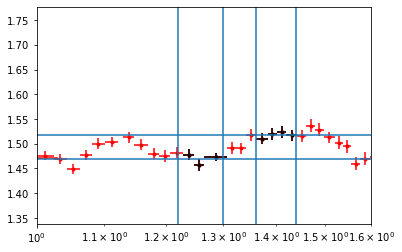

1389000584.0454729


In [19]:
hband_low = np.where(w>=1.36)[0][0]
hband_up = np.where(w>=1.44)[0][0]

jband_low = np.where(w>=1.22)[0][0]
jband_up = np.where(w>=1.30)[0][0]

plt.figure()
plt.axvline(1.36)
plt.axvline(1.44)

plt.axvline(1.22)
plt.axvline(1.30)

plt.errorbar(w,depths*100, xerr=we, yerr= depthse*100, marker='.', color='r', ls='None',zorder=1)
plt.errorbar(w[hband_low:hband_up],depths[hband_low:hband_up]*100, xerr=we[hband_low:hband_up], yerr= depthse[hband_low:hband_up]*100, marker='.', color='k', ls='None',zorder=1)
plt.errorbar(w[jband_low:jband_up],depths[jband_low:jband_up]*100, xerr=we[jband_low:jband_up], yerr= depthse[jband_low:jband_up]*100, marker='.', color='k', ls='None',zorder=1)

Jband = np.mean(depths[jband_low:jband_up])
Hband = np.mean(depths[hband_low:hband_up])

plt.axhline(Jband*100)
plt.axhline(Hband*100)

plt.xlim(1,1.6)
plt.xscale('log')
plt.show()

print((Hband-Jband)/dD)

#1.22  1.30

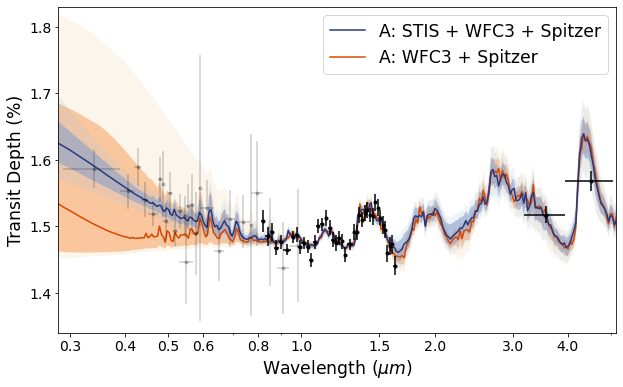

In [20]:
fig, ax1 = plt.subplots(1,figsize=(10,6))

ax1.errorbar(w[:26],depths[:26]*100, xerr=we[:26], yerr= depthse[:26]*100, marker='.', color='k', ls='None',zorder=1,alpha=0.2)
ax1.errorbar(w[26:],depths[26:]*100, xerr=we[26:], yerr= depthse[26:]*100, marker='.', color='k', ls='None',zorder=1)

ax1.plot(atmo_dh_wl_binned,atmo_dh_med_binned*100, color='#2A377B', label='A: STIS + WFC3 + Spitzer',zorder=0.7)
ax1.fill_between(atmo_dh_wl_binned, atmo_dh_low1_binned*100, atmo_dh_up1_binned*100, color='#6E8DC9', alpha=0.5, edgecolor=None,zorder=0.2)
ax1.fill_between(atmo_dh_wl_binned, atmo_dh_low2_binned*100, atmo_dh_up2_binned*100, color='#A8C8E6', alpha=0.2, edgecolor=None,zorder=0.2)

ax1.plot(adhIR_wl_binned,adhIR_med_binned*100, color='#d94701', label='A: WFC3 + Spitzer ',zorder=0.5)
ax1.fill_between(adhIR_wl_binned, adhIR_low1_binned*100, adhIR_up1_binned*100, color='#fd8d3c', alpha=0.5, edgecolor=None,zorder=0)
ax1.fill_between(adhIR_wl_binned, adhIR_low2_binned*100, adhIR_up2_binned*100, color='#F2CEA1', alpha=0.2, edgecolor=None,zorder=0)


ax1.legend(fontsize='xx-large')
ax1.set_xlim(atmo_dh_wl_binned[0],atmo_dh_wl_binned[-1])
ax1.set_ylim(1.34,1.83)
ax1.set_xscale('log')
ax1.set_xticks([0.3, 0.4, 0.5, 0.6, 0.8, 1.0,1.5,2.0, 3.0, 4.0])
ax1.get_xaxis().set_major_formatter(tck.ScalarFormatter())

ax1.set_ylabel("Transit Depth (%)",fontsize='xx-large')
ax1.set_xlabel("Wavelength ($\mu m$)",fontsize='xx-large')

ax1.tick_params(axis='both', which='major', labelsize=14)

plt.savefig("ir_vs_optical.pdf", bbox_inches='tight')
plt.show()

In [21]:
atmo_2eb_dict = pickle.load(open('WASP17b_4000atmo_2EB-hist.pickle', 'rb'))
atmo_dh_dict = pickle.load(open('WASP17b_4000atmo_deckhaze-hist.pickle', 'rb'))
cs5_dict = pickle.load(open('WASP17b_4000chem_species5-hist.pickle', 'rb'))

dict_keys(['PT', 'Rp', 'X', 'Species_names', 'cloud', 'CtoO', 'Met'])

In [22]:
print(atmo_2eb_dict['Species_names'])
print(atmo_dh_dict['Species_names'])
print(cs5_dict['Species_names'])

['Na' 'K' 'H2O' 'CH4' 'CO' 'CO2']
['H-' 'H2O' 'CH4' 'CO2' 'TiO']
['H-' 'Na' 'K' 'H2O' 'CH4' 'CO' 'CO2' 'VO' 'TiO']


In [23]:
atmo_2eb_na = []
atmo_2eb_k = []
atmo_2eb_h2o = []
atmo_2eb_ch4 = []
atmo_2eb_co = []
atmo_2eb_co2 = []
for i in range(33597):
    atmo_2eb_na.append(atmo_2eb_dict['X'][i][0,0])
    atmo_2eb_k.append(atmo_2eb_dict['X'][i][1,0])
    atmo_2eb_h2o.append(atmo_2eb_dict['X'][i][2,0])
    atmo_2eb_ch4.append(atmo_2eb_dict['X'][i][3,0])
    atmo_2eb_co.append(atmo_2eb_dict['X'][i][4,0])
    atmo_2eb_co2.append(atmo_2eb_dict['X'][i][5,0])
    
atmo_dh_h = []
atmo_dh_h2o = []
atmo_dh_ch4 = []
atmo_dh_co2 = []
atmo_dh_tio = []
for i in range(34951):
    atmo_dh_h.append(atmo_dh_dict['X'][i][0,0])
    atmo_dh_h2o.append(atmo_dh_dict['X'][i][1,0])
    atmo_dh_ch4.append(atmo_dh_dict['X'][i][2,0])
    atmo_dh_co2.append(atmo_dh_dict['X'][i][3,0])
    atmo_dh_tio.append(atmo_dh_dict['X'][i][4,0])
    
    
cs5_h = []
cs5_na = []
cs5_k = []
cs5_h2o = []
cs5_ch4 = []
cs5_co = []
cs5_co2 = []
cs5_vo = []
cs5_tio = []
for i in range(33211):
    cs5_h.append(cs5_dict['X'][i][0,0])
    cs5_na.append(cs5_dict['X'][i][1,0])
    cs5_k.append(cs5_dict['X'][i][2,0])
    cs5_h2o.append(cs5_dict['X'][i][3,0])
    cs5_ch4.append(cs5_dict['X'][i][4,0])
    cs5_co.append(cs5_dict['X'][i][5,0])
    cs5_co2.append(cs5_dict['X'][i][6,0])
    cs5_vo.append(cs5_dict['X'][i][7,0])
    cs5_tio.append(cs5_dict['X'][i][8,0])

In [24]:
cs5_CtoH = (cs5_dict['Met'] * np.power(10.0, (8.69-12.0))) * cs5_dict['CtoO']
atmo_2eb_CtoH = (atmo_2eb_dict['Met'] * np.power(10.0, (8.69-12.0))) * atmo_2eb_dict['CtoO']
atmo_dh_CtoH = (atmo_dh_dict['Met'] * np.power(10.0, (8.69-12.0))) * atmo_dh_dict['CtoO']

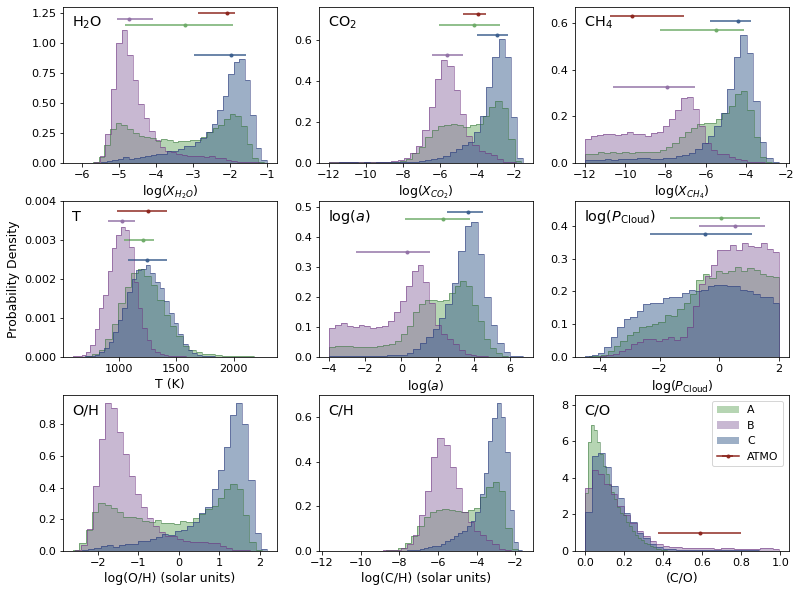

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(3,3, figsize=(13,10))#, sharey=True)

plt.subplots_adjust(wspace=0.2, hspace=0.25)

ax[0,0].text(0.04, 0.875, "H$_2$O", fontsize='x-large',transform = ax[0,0].transAxes) #5

atmo_dh_h2o_weights = np.ones_like(atmo_dh_h2o)/float(len(atmo_dh_h2o))
atmo_2eb_h2o_weights = np.ones_like(atmo_2eb_h2o)/float(len(atmo_2eb_h2o))
cs5_h2o_weights = np.ones_like(cs5_h2o)/float(len(cs5_h2o))

ax[0,0].errorbar(bounds[5][0],1.15,xerr=[[bounds[5][2]],[bounds[5][1]]],marker='.', color='#6FAC69')
ax[0,0].errorbar(bounds[5][3],1.2,xerr=[[bounds[5][5]],[bounds[5][4]]],marker='.', color='#9372A7')
ax[0,0].errorbar(bounds[5][6],0.9,xerr=[[bounds[5][8]],[bounds[5][7]]],marker='.', color='#3D608F')
ax[0,0].errorbar(bounds[5][9],1.25,xerr=[[bounds[5][11]],[bounds[5][10]]],marker='.', color='#8D261E', label='ATMO')


x,w,patches = ax[0,0].hist(atmo_dh_h2o,bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_h2o_weights)
x,w,patches = ax[0,0].hist(atmo_dh_h2o,bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON Simple',density=True, stacked=True, weights=atmo_dh_h2o_weights)
x,w,patches = ax[0,0].hist(atmo_2eb_h2o,bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_h2o_weights)
x,w,patches = ax[0,0].hist(atmo_2eb_h2o,bins=30,alpha=0.5,color='#9372A7', label='POSEIDON Sample 1',density=True, stacked=True, weights=atmo_2eb_h2o_weights)
x,w,patches = ax[0,0].hist(cs5_h2o,bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_h2o_weights)
x,w,patches = ax[0,0].hist(cs5_h2o,bins=30,alpha=0.5,color='#3D608F', label='POSEIDON Sample 2',density=True, stacked=True, weights=cs5_h2o_weights)
ax[0,0].set_xlabel("log($X_{H_2O}$)",fontsize='12.5')
#ax[0,0].set_ylabel("Normalised Probability\nDensity (log($X_{H_2O}$))",fontsize='12.5')

ax[0,0].set_xlim(-6.5,-0.75)
ax[0,0].set_ylim(0,1.3)
ax[0,0].tick_params(axis='both', which='major', labelsize=11.25)


#####################################

ax[0,1].text(0.04, 0.875, "CO$_2$", fontsize='x-large',transform = ax[0,1].transAxes) #8

atmo_dh_co2_weights = np.ones_like(atmo_dh_co2)/float(len(atmo_dh_co2))
atmo_2eb_co2_weights = np.ones_like(atmo_2eb_co2)/float(len(atmo_2eb_co2))
cs5_co2_weights = np.ones_like(cs5_co2)/float(len(cs5_co2))

ax[0,1].errorbar(bounds[8][0],0.675,xerr=[[bounds[8][2]],[bounds[8][1]]],marker='.', color='#6FAC69')
ax[0,1].errorbar(bounds[8][3],0.525,xerr=[[bounds[8][5]],[bounds[8][4]]],marker='.', color='#9372A7')
ax[0,1].errorbar(bounds[8][6],0.625,xerr=[[bounds[8][8]],[bounds[8][7]]],marker='.', color='#3D608F')
ax[0,1].errorbar(bounds[8][9],0.725,xerr=[[bounds[8][11]],[bounds[8][10]]],marker='.', color='#8D261E')

ax[0,1].hist(atmo_dh_co2,bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_co2_weights)
ax[0,1].hist(atmo_dh_co2,bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON Simple',density=True, stacked=True, weights=atmo_dh_co2_weights)
ax[0,1].hist(atmo_2eb_co2,bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_co2_weights)
ax[0,1].hist(atmo_2eb_co2,bins=30,alpha=0.5,color='#9372A7', label='POSEIDON Sample 1',density=True, stacked=True, weights=atmo_2eb_co2_weights)
ax[0,1].hist(cs5_co2,bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_co2_weights)
ax[0,1].hist(cs5_co2,bins=30,alpha=0.5,color='#3D608F', label='POSEIDON Sample 2',density=True, stacked=True, weights=cs5_co2_weights)
ax[0,1].set_xlabel("log($X_{CO_2}$)",fontsize='12.5')
#ax[0,1].set_ylabel("Normalised Probability\nDensity (log($X_{CO_2}$))",fontsize='12.5')
ax[1,0].set_ylabel("Probability Density",fontsize='12.5')

ax[0,1].set_ylim(0,0.76)
ax[0,1].tick_params(axis='both', which='major', labelsize=11.25)

######################################

ax[0,2].text(0.04, 0.875, "CH$_4$", fontsize='x-large',transform = ax[0,2].transAxes) #6

atmo_dh_ch4_weights = np.ones_like(atmo_dh_ch4)/float(len(atmo_dh_ch4))
atmo_2eb_ch4_weights = np.ones_like(atmo_2eb_ch4)/float(len(atmo_2eb_ch4))
cs5_ch4_weights = np.ones_like(cs5_ch4)/float(len(cs5_ch4))

ax[0,2].errorbar(bounds[6][0],0.57,xerr=[[bounds[6][2]],[bounds[6][1]]],marker='.', color='#6FAC69')
ax[0,2].errorbar(bounds[6][3],0.325,xerr=[[bounds[6][5]],[bounds[6][4]]],marker='.', color='#9372A7')
ax[0,2].errorbar(bounds[6][6],0.61,xerr=[[bounds[6][8]],[bounds[6][7]]],marker='.', color='#3D608F')
ax[0,2].errorbar(bounds[6][9],0.63,xerr=[[bounds[6][11]],[bounds[6][10]]],marker='.', color='#8D261E')

ax[0,2].hist(atmo_dh_ch4,bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_ch4_weights)
ax[0,2].hist(atmo_dh_ch4,bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON Simple',density=True, stacked=True, weights=atmo_dh_ch4_weights)
ax[0,2].hist(atmo_2eb_ch4,bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_ch4_weights)
ax[0,2].hist(atmo_2eb_ch4,bins=30,alpha=0.5,color='#9372A7', label='POSEIDON Sample 1',density=True, stacked=True, weights=atmo_2eb_ch4_weights)
ax[0,2].hist(cs5_ch4,bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_ch4_weights)
ax[0,2].hist(cs5_ch4,bins=30,alpha=0.5,color='#3D608F', label='POSEIDON Sample 2',density=True, stacked=True, weights=cs5_ch4_weights)
ax[0,2].set_xlabel("log($X_{CH_4}$)",fontsize='12.5')
#ax[0,2].set_ylabel("Normalised Probability\nDensity (log($X_{CH_4}$))",fontsize='12.5')

ax[0,2].set_ylim(0,0.67)
ax[0,2].tick_params(axis='both', which='major', labelsize=11.25)

######################################

ax[1,0].text(0.04, 0.875, "T", fontsize='x-large',transform = ax[1,0].transAxes) #11

atmo_dh_t_weights = np.ones_like(atmo_dh_dict['PT'][:,0])/float(len(atmo_dh_dict['PT'][:,0]))
atmo_2eb_t_weights = np.ones_like(atmo_2eb_dict['PT'][:,0])/float(len(atmo_2eb_dict['PT'][:,0]))
cs5_t_weights = np.ones_like(cs5_dict['PT'][:,0])/float(len(cs5_dict['PT'][:,0]))

ax[1,0].errorbar(bounds[0][0],0.003,xerr=[[bounds[0][2]],[bounds[0][1]]],marker='.', color='#6FAC69')
ax[1,0].errorbar(bounds[0][3],0.0035,xerr=[[bounds[0][5]],[bounds[0][4]]],marker='.', color='#9372A7')
ax[1,0].errorbar(bounds[0][6],0.0025,xerr=[[bounds[0][8]],[bounds[0][7]]],marker='.', color='#3D608F')
ax[1,0].errorbar(bounds[0][9],0.00375,xerr=[[bounds[0][11]],[bounds[0][10]]],marker='.', color='#8D261E')

ax[1,0].hist(atmo_dh_dict['PT'][:,0],bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_t_weights)
ax[1,0].hist(atmo_dh_dict['PT'][:,0],bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON - Minimal',density=True, stacked=True, weights=atmo_dh_t_weights)
ax[1,0].hist(atmo_2eb_dict['PT'][:,0],bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_t_weights)
ax[1,0].hist(atmo_2eb_dict['PT'][:,0],bins=30,alpha=0.5,color='#9372A7', label='POSEIDON - Sample 1',density=True, stacked=True, weights=atmo_2eb_t_weights)
ax[1,0].hist(cs5_dict['PT'][:,0],bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_t_weights)
ax[1,0].hist(cs5_dict['PT'][:,0],bins=30,alpha=0.5,color='#3D608F', label='POSEIDON - Sample 2',density=True, stacked=True, weights=cs5_t_weights)
ax[1,0].set_xlabel("T (K)",fontsize='12.5')
#ax[1,0].set_ylabel("Normalised Probability\nDensity (T)",fontsize='12.5')

ax[1,0].set_ylim(0,0.004)
ax[1,0].tick_params(axis='both', which='major', labelsize=11.25)

#####################################

ax[1,1].text(0.04, 0.875, "log($a$)", fontsize='x-large',transform = ax[1,1].transAxes) #11

atmo_dh_a_weights = np.ones_like(atmo_dh_dict['cloud'][:,0])/float(len(atmo_dh_dict['cloud'][:,0]))
atmo_2eb_a_weights = np.ones_like(atmo_2eb_dict['cloud'][:,0])/float(len(atmo_2eb_dict['cloud'][:,0]))
cs5_a_weights = np.ones_like(cs5_dict['cloud'][:,0])/float(len(cs5_dict['cloud'][:,0]))

ax[1,1].errorbar(bounds[11][0],0.46,xerr=[[bounds[11][2]],[bounds[11][1]]],marker='.', color='#6FAC69')
ax[1,1].errorbar(bounds[11][3],0.35,xerr=[[bounds[11][5]],[bounds[11][4]]],marker='.', color='#9372A7')
ax[1,1].errorbar(bounds[11][6],0.485,xerr=[[bounds[11][8]],[bounds[11][7]]],marker='.', color='#3D608F')

ax[1,1].hist(atmo_dh_dict['cloud'][:,0],bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_a_weights)
ax[1,1].hist(atmo_dh_dict['cloud'][:,0],bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON Simple',density=True, stacked=True, weights=atmo_dh_a_weights)
ax[1,1].hist(atmo_2eb_dict['cloud'][:,0],bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_a_weights)
ax[1,1].hist(atmo_2eb_dict['cloud'][:,0],bins=30,alpha=0.5,color='#9372A7', label='POSEIDON Sample 1',density=True, stacked=True, weights=atmo_2eb_a_weights)
ax[1,1].hist(cs5_dict['cloud'][:,0],bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_a_weights)
ax[1,1].hist(cs5_dict['cloud'][:,0],bins=30,alpha=0.5,color='#3D608F', label='POSEIDON Sample 2',density=True, stacked=True, weights=cs5_a_weights)
ax[1,1].set_xlabel("log($a$)",fontsize='12.5')
#ax[1,1].set_ylabel("Normalised Probability\nDensity (log($a$)",fontsize='12.5')

ax[1,1].set_ylim(0,0.52)
ax[1,1].tick_params(axis='both', which='major', labelsize=11.25)

#####################################

ax[1,2].text(0.04, 0.875, "log($P_\mathrm{Cloud}$)", fontsize='x-large',transform = ax[1,2].transAxes) #13

atmo_dh_g_weights = np.ones_like(atmo_dh_dict['cloud'][:,2])/float(len(atmo_dh_dict['cloud'][:,2]))
atmo_2eb_g_weights = np.ones_like(atmo_2eb_dict['cloud'][:,2])/float(len(atmo_2eb_dict['cloud'][:,2]))
cs5_g_weights = np.ones_like(cs5_dict['cloud'][:,2])/float(len(cs5_dict['cloud'][:,2]))

ax[1,2].errorbar(bounds[13][0],0.425,xerr=[[bounds[13][2]],[bounds[13][1]]],marker='.', color='#6FAC69')
ax[1,2].errorbar(bounds[13][3],0.4,xerr=[[bounds[13][5]],[bounds[13][4]]],marker='.', color='#9372A7')
ax[1,2].errorbar(bounds[13][6],0.375,xerr=[[bounds[13][8]],[bounds[13][7]]],marker='.', color='#3D608F')

ax[1,2].hist(atmo_dh_dict['cloud'][:,2],bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True, weights=atmo_dh_g_weights)
ax[1,2].hist(atmo_dh_dict['cloud'][:,2],bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON Simple',density=True, stacked=True, weights=atmo_dh_g_weights)
ax[1,2].hist(atmo_2eb_dict['cloud'][:,2],bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True, weights=atmo_2eb_g_weights)
ax[1,2].hist(atmo_2eb_dict['cloud'][:,2],bins=30,alpha=0.5,color='#9372A7', label='POSEIDON Sample 1',density=True, stacked=True, weights=atmo_2eb_g_weights)
ax[1,2].hist(cs5_dict['cloud'][:,2],bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True, weights=cs5_g_weights)
ax[1,2].hist(cs5_dict['cloud'][:,2],bins=30,alpha=0.5,color='#3D608F', label='POSEIDON Sample 2',density=True, stacked=True, weights=cs5_g_weights)
ax[1,2].set_xlabel("log($P_\mathrm{Cloud}$)",fontsize='12.5')
#ax[1,2].set_ylabel("Normalised Probability\nDensity (log($P_\mathrm{Cloud}$))",fontsize='12.5')

ax[1,2].set_ylim(0,0.475)
ax[1,2].tick_params(axis='both', which='major', labelsize=11.25)

###############################

ax[2,0].text(0.04, 0.875, "O/H", fontsize='x-large',transform = ax[2,0].transAxes) #11

#ax[2,0].errorbar(bounds[0][0],0.003,xerr=[[bounds[0][2]],[bounds[0][1]]],marker='.', color='#6FAC69')
#ax[2,0].errorbar(bounds[0][3],0.0035,xerr=[[bounds[0][5]],[bounds[0][4]]],marker='.', color='#9372A7')
#ax[2,0].errorbar(bounds[0][6],0.0025,xerr=[[bounds[0][8]],[bounds[0][7]]],marker='.', color='#3D608F')

ax[2,0].hist(np.log10(atmo_dh_dict['Met']),bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True)
ax[2,0].hist(np.log10(atmo_dh_dict['Met']),bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON - Minimal',density=True, stacked=True)
ax[2,0].hist(np.log10(atmo_2eb_dict['Met']),bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True)
ax[2,0].hist(np.log10(atmo_2eb_dict['Met']),bins=30,alpha=0.5,color='#9372A7', label='POSEIDON - Sample 1',density=True)
ax[2,0].hist(np.log10(cs5_dict['Met']),bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True)
ax[2,0].hist(np.log10(cs5_dict['Met']),bins=30,alpha=0.5,color='#3D608F', label='POSEIDON - Sample 2',density=True, stacked=True)
ax[2,0].set_xlabel("log(O/H) (solar units)",fontsize='12.5')
#ax[2,0].set_ylabel("Normalised Probability\nDensity (O/H)",fontsize='12.5')

ax[2,0].tick_params(axis='both', which='major', labelsize=11.25)

###############################

ax[2,1].text(0.04, 0.875, "C/H", fontsize='x-large',transform = ax[2,1].transAxes) #11

#ax[2,0].errorbar(bounds[0][0],0.003,xerr=[[bounds[0][2]],[bounds[0][1]]],marker='.', color='#6FAC69')
#ax[2,0].errorbar(bounds[0][3],0.0035,xerr=[[bounds[0][5]],[bounds[0][4]]],marker='.', color='#9372A7')
#ax[2,0].errorbar(bounds[0][6],0.0025,xerr=[[bounds[0][8]],[bounds[0][7]]],marker='.', color='#3D608F')

ax[2,1].hist(np.log10(atmo_dh_CtoH),bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True)
ax[2,1].hist(np.log10(atmo_dh_CtoH),bins=30,alpha=0.5,color='#6FAC69', label='POSEIDON - Minimal',density=True, stacked=True)
ax[2,1].hist(np.log10(atmo_2eb_CtoH),bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True)
ax[2,1].hist(np.log10(atmo_2eb_CtoH),bins=30,alpha=0.5,color='#9372A7', label='POSEIDON - Sample 1',density=True)
ax[2,1].hist(np.log10(cs5_CtoH),bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True)
ax[2,1].hist(np.log10(cs5_CtoH),bins=30,alpha=0.5,color='#3D608F', label='POSEIDON - Sample 2',density=True, stacked=True)
ax[2,1].set_xlabel("log(C/H) (solar units)",fontsize='12.5')
#ax[2,1].set_ylabel("Normalised Probability\nDensity (C/H)",fontsize='12.5')

ax[2,1].tick_params(axis='both', which='major', labelsize=11.25)

###############################

ax[2,2].text(0.04, 0.875, "C/O", fontsize='x-large',transform = ax[2,2].transAxes) #11

#ax[2,0].errorbar(bounds[0][0],0.003,xerr=[[bounds[0][2]],[bounds[0][1]]],marker='.', color='#6FAC69')
#ax[2,0].errorbar(bounds[0][3],0.0035,xerr=[[bounds[0][5]],[bounds[0][4]]],marker='.', color='#9372A7')
#ax[2,0].errorbar(bounds[0][6],0.0025,xerr=[[bounds[0][8]],[bounds[0][7]]],marker='.', color='#3D608F')

ax[2,2].hist(atmo_dh_dict['CtoO'],bins=30,alpha=0.5,color='#3A763E', histtype='step',density=True, stacked=True)
ax[2,2].hist(atmo_dh_dict['CtoO'],bins=30,alpha=0.5,color='#6FAC69', label='A',density=True, stacked=True)
ax[2,2].hist(atmo_2eb_dict['CtoO'],bins=30,alpha=0.5,color='#6D2F7F', histtype='step',density=True, stacked=True)
ax[2,2].hist(atmo_2eb_dict['CtoO'],bins=30,alpha=0.5,color='#9372A7', label='B',density=True)
ax[2,2].hist(cs5_dict['CtoO'],bins=30,alpha=0.5,color='#2A377B', histtype='step',density=True, stacked=True)
ax[2,2].hist(cs5_dict['CtoO'],bins=30,alpha=0.5,color='#3D608F', label='C',density=True, stacked=True)
ax[2,2].set_xlabel("(C/O)",fontsize='12.5')
#ax[2,2].set_ylabel("Normalised Probability\nDensity (C/O)",fontsize='12.5')

ax[2,2].set_ylim(0,8.5)
ax[2,2].tick_params(axis='both', which='major', labelsize=11.25)

ax[2,2].errorbar(0.58696736,1,xerr=[[0.21464444],[0.20927404]],marker='.', color='#8D261E', label='ATMO')

ax[2,2].legend(fontsize='11', loc='upper right')




plt.show()

plt.savefig("retrieval_hists.pdf", bbox_inches='tight')